<a href="https://colab.research.google.com/github/Lalo-Reyes-12/repo/blob/main/Task2_BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluated Exercise – Part II: SciKit-Stack
Eduardo Reyes Antonio

### Preliminary Steps

In [59]:
# Mount drive to read file from google drive. file should be already on personal drive. 
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
#Import useful libraries and load the data
import pandas as pd 
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#To split the data
from sklearn.model_selection import train_test_split
import numpy as np
# importing module for Linear Regression
from sklearn.linear_model import LinearRegression
#For modelling
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
#To creat charts
from matplotlib import pyplot as plt
%matplotlib inline

We don't need to clean the data because proffessor mentioned it was already cleansed. We will check later for the descriptives and missing values.
Also a schema is not logical because we only have one table containing all relevant data

In [88]:
#Read the CSV File LoanStats
df=pd.DataFrame(pd.read_csv('/content/drive/My Drive/LoanStats[1].csv'))
#We check for the data types in order to transform from categorical values to numerical ones later on
df.dtypes

int_rate          float64
loan_amnt           int64
term                int64
grade              object
home_ownership     object
annual_inc        float64
purpose            object
dtype: object

### Data Understanding
To start the analysis of Data Understanding, we select some rows of the dataset

In [62]:
#We add an ID for each record in case we need them for later
#df['id'] = df.index + 1 
#We see the First Rows of the data
#df.head()
df.head(15)

,int_rate,loan_amnt,term,grade,home_ownership,annual_inc,purpose
0,10.65,5000,36,B,RENT,24000.0,credit_card
1,15.27,2500,60,C,RENT,30000.0,car
2,15.96,2400,36,C,RENT,12252.0,small_business
3,13.49,10000,36,C,RENT,49200.0,other
4,12.69,3000,60,B,RENT,80000.0,other
5,7.90,5000,36,A,RENT,36000.0,wedding
6,15.96,7000,60,C,RENT,47004.0,debt_consolidation
7,18.64,3000,36,E,RENT,48000.0,car
8,21.28,5600,60,F,OWN,40000.0,small_business
9,12.69,5375,60,B,RENT,15000.0,other


We identify that there are some numeric variables and some categorical. The dependent variable is int_rate, the numerical variables are loan_amt and annual_inc. Term, grade, home_ownership and purpose are categorical variables.

In [63]:
#We check for some descriptive statistics
for col in df:
    description = df[col].describe()
    print ('Variable: '+col, '\n',description
            ,'\n')

Variable: int_rate 
 count    39786.000000
mean        12.027873
std          3.727466
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64 

Variable: loan_amnt 
 count    39786.000000
mean     11231.360277
std       7464.542832
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64 

Variable: term 
 count    39786.000000
mean        42.448499
std         10.638782
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term, dtype: float64 

Variable: grade 
 count     39786
unique        7
top           B
freq      12035
Name: grade, dtype: object 

Variable: home_ownership 
 count     39786
unique        5
top        RENT
freq      18918
Name: home_ownership, dtype: object 

Variable: annual_inc 
 count    3.978600e+04
mean     6.897907e+04
std      

In [64]:
#Descriptive statistics in other style
stats = df.describe(include='all')
print(stats)

            int_rate     loan_amnt          term  grade home_ownership  \
count   39786.000000  39786.000000  39786.000000  39786          39786   
unique           NaN           NaN           NaN      7              5   
top              NaN           NaN           NaN      B           RENT   
freq             NaN           NaN           NaN  12035          18918   
mean       12.027873  11231.360277     42.448499    NaN            NaN   
std         3.727466   7464.542832     10.638782    NaN            NaN   
min         5.420000    500.000000     36.000000    NaN            NaN   
25%         9.250000   5500.000000     36.000000    NaN            NaN   
50%        11.860000  10000.000000     36.000000    NaN            NaN   
75%        14.590000  15000.000000     60.000000    NaN            NaN   
max        24.590000  35000.000000     60.000000    NaN            NaN   

          annual_inc             purpose  
count   3.978600e+04               39786  
unique           NaN     

Now we explore the distribution of the values in the eatures. Lets remember that for categorical variables we can use bar charts to represent the distribution and for continuous variables we should use histograms (bins) to represent the distribution.

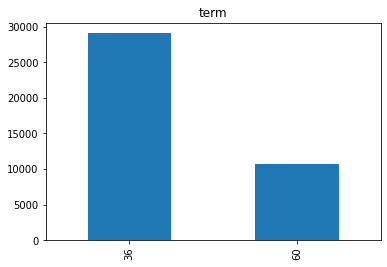

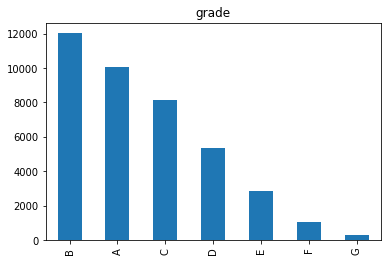

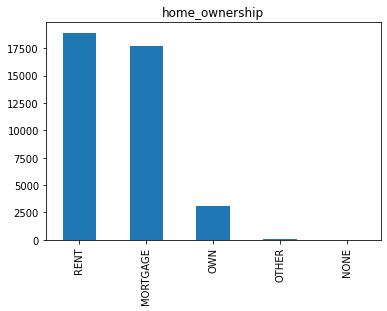

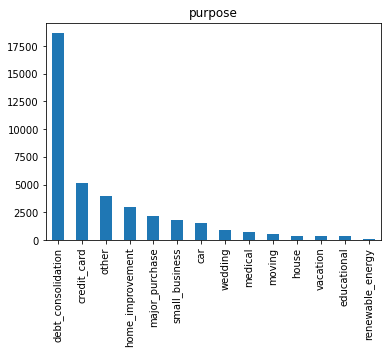

In [65]:
# Check for the distribution in the features (barchart)
features1 = ['term','grade','home_ownership','purpose']
for col in features1:
    df[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

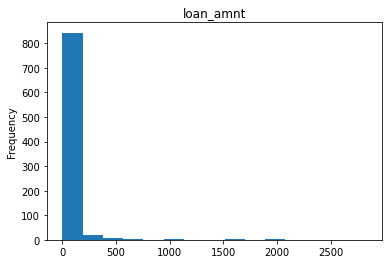

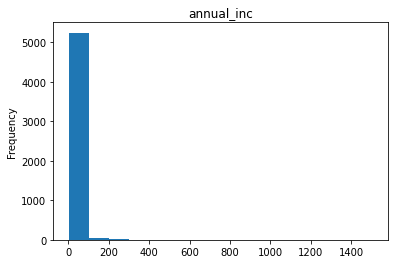

In [66]:
# Check for the distribution in the features (histograms)
features2 = df[['loan_amnt','annual_inc']]
for col in features2:
    features2[col].value_counts().plot.hist(bins=15)
    plt.title(col)
    plt.show()

### Data preparation
We check for missing values, outliers, etc, before the part for modeling.

In [89]:
#Percentage of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
int_rate,0.0
loan_amnt,0.0
term,0.0
grade,0.0
home_ownership,0.0
annual_inc,0.0
purpose,0.0


In [90]:
 #We show some rows
df.head()

,int_rate,loan_amnt,term,grade,home_ownership,annual_inc,purpose
0,10.65,5000,36,B,RENT,24000.0,credit_card
1,15.27,2500,60,C,RENT,30000.0,car
2,15.96,2400,36,C,RENT,12252.0,small_business
3,13.49,10000,36,C,RENT,49200.0,other
4,12.69,3000,60,B,RENT,80000.0,other


In [91]:
#We check for the variables we are going to transform as they are categorical non numerical.
df.dtypes
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.describe()

,grade,home_ownership,purpose
count,39786,39786,39786
unique,7,5,14
top,B,RENT,debt_consolidation
freq,12035,18918,18676


In [92]:
#We transform the categorical variables and encode them to later use them in the model
df_new = pd.get_dummies(df)
df_new.head()
df = df_new
#We check for the data structure now
df.head()

,int_rate,loan_amnt,term,annual_inc,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10.65,5000,36,24000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.27,2500,60,30000.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15.96,2400,36,12252.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,13.49,10000,36,49200.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,12.69,3000,60,80000.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [71]:
# Separate features and labels into X and Y (independent and dependent variables)
X, y = df.iloc[:,1:], df.loc[:,"int_rate"]


In [72]:
#Check for outliers. In this case we are only checking annual income and loan amount as the other variables are categorical.
# Outliers of annual income identification with zscore
def outlier_replacement(data):
  copy_train_df = data.copy()
  df = data.copy()
  for col in df.columns:
      mean = df[col].mean()
      std_dev = df[col].std(axis=0)
      copy_train_df[col] = np.where(df[col] > (mean + 3*std_dev), 1, np.where(df[col] < (mean - 3*std_dev), 1, 0))                            
      df[col] = np.where(df[col] > (mean + 3*std_dev) , (mean + 3*std_dev), np.where(df[col] < (mean - 3*std_dev) , (mean - 3*std_dev), df[col]))  
  print("TOTAL OF VALUES: ", (copy_train_df.isnull().sum().sum() + copy_train_df.notnull().sum().sum()),
        "\nTOTAL OF OUTLIERS: ", copy_train_df.sum().sum(),
        "\nPERCENTAGE OF OUTLIERS REPLACED: ", (copy_train_df.sum().sum()/(copy_train_df.isnull().sum().sum() + copy_train_df.notnull().sum().sum()))*100, "%"  )
  return df
outlier_replacement(X)

TOTAL OF VALUES:  1153794 
TOTAL OF OUTLIERS:  20375 
PERCENTAGE OF OUTLIERS REPLACED:  1.765913152607831 %


,loan_amnt,term,annual_inc,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,36.0,24000.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,2500.0,60.0,30000.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,2400.0,36.0,12252.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.674622,0.0,0.0
3,10000.0,36.0,49200.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0
4,3000.0,60.0,80000.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,2500.0,36.0,110000.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.865338,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
39782,8500.0,36.0,18000.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
39783,5000.0,36.0,100000.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
39784,5000.0,36.0,200000.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0


In [73]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
X_train
#print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))


,loan_amnt,term,annual_inc,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
25431,7200,60,35328.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1059,7200,36,53000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38935,25000,36,140000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33418,14400,36,200000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36739,1600,36,38600.0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,9000,60,48000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32103,12500,36,36500.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30403,17000,36,51000.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21243,9000,36,60000.0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Modeling
Here we will work with different models such as Linear Regression, Decision Tree Regressor, Random Forest Regressor and Gradient Boosting Regressor. We will continue to work with the best of them.

In [74]:
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

LinearRegression()

In [75]:
#Get the predictions for int_rate
y_prediction =  LR.predict(X_test)
y_prediction

array([10.94237611, 10.85788312, 13.20042684, ..., 10.89063258,
       13.68714203, 13.46615733])

In [76]:
# predicting the accuracy score R^2
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.9251993809540557
mean_sqrd_error is== 1.0321222447130671
root_mean_squared error of is== 1.0159341734153189


MSE: 1.0321222447130671
RMSE: 1.0159341734153189
R2: 0.9251993809540557


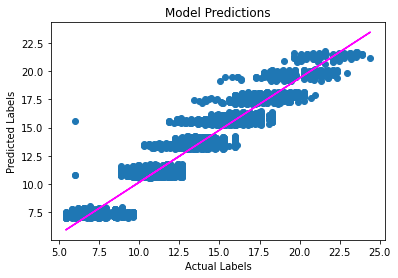

In [77]:
#Our first model is Linear Regression
%matplotlib inline
predictions = LR.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

plt.scatter(y_test, y_prediction)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Model Predictions')
# overlay the regression line
z = np.polyfit(y_test, y_prediction, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

DecisionTreeRegressor() 

MSE: 2.008837740518166
RMSE: 1.4173347312890368
R2: 0.8544142350159422


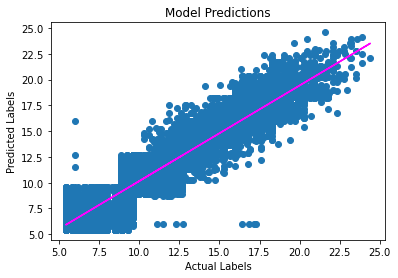

In [78]:
#This is the second model, it is Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
#\ Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Model Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

RandomForestRegressor() 

MSE: 1.180247897880565
RMSE: 1.0863921473761513
R2: 0.9144643245106264


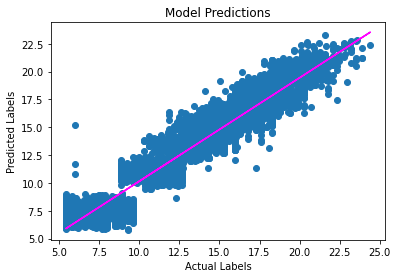

In [79]:
#This is the third model. It is Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Model Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

GradientBoostingRegressor() 

MSE: 0.9895228369253407
RMSE: 0.994747624739733
R2: 0.9282866722994704


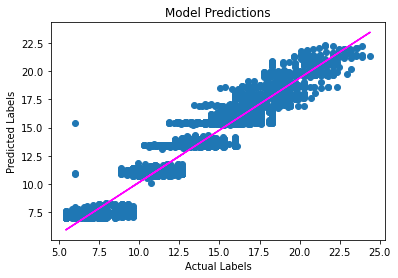

In [80]:
# This is the 4th model, it is a Gradient Boosting Regressor 
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Model Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

We select the model Gradient Boosting Regressor as is the one retrieving the best r2 score, with a value of 0.928286. Now we move on to some hyperparameter tuning to find out how we can improve this model.

### Hyperparameter Tuning / Grid Search

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 150} 

GradientBoostingRegressor(n_estimators=150) 

MSE: 0.987945110643483
RMSE: 0.9939542799563182
R2: 0.9284010142809289


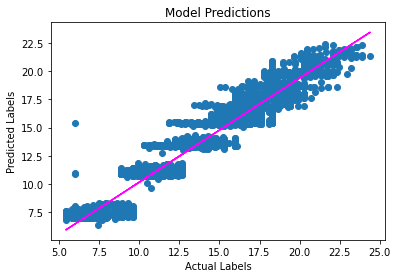

In [81]:
#Lets start the Grid Search using the best model that was GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Model Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

We found out that the best parameter combination was: 'learning_rate': 0.1, 'n_estimators': 150 and with that now we get an r2 socre of 0.928401. 

### Random Search
Now we try some Random Search to find out if we can create an even more promising model.

In [82]:
from scipy.stats import loguniform
from sklearn.ensemble import GradientBoostingRegressor

param_distributions = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "learning_rate": loguniform(0.01, 1),
}
search_cv = RandomizedSearchCV(
    GradientBoostingRegressor(), param_distributions=param_distributions,
    scoring='r2', n_iter=20, random_state=0, n_jobs=2
)
search_cv.fit(X_train, y_train)

columns = [f"param_{name}" for name in param_distributions.keys()]
columns += ["mean_test_error", "std_test_error"]
cv_results = pd.DataFrame(search_cv.cv_results_)
cv_results["mean_test_error"] = -cv_results["mean_test_score"]
cv_results["std_test_error"] = cv_results["std_test_score"]
cv_results[columns].sort_values(by="mean_test_error")

,param_n_estimators,param_max_leaf_nodes,param_learning_rate,mean_test_error,std_test_error
10,100,20,0.109889,-0.927421,0.001425
1,200,20,0.160519,-0.927402,0.001449
12,200,2,0.118781,-0.924586,0.001440
4,100,5,0.0351,-0.921135,0.001201
14,5,50,0.353563,-0.893350,0.000986
13,100,20,0.016286,-0.859787,0.000696
6,1,100,0.709894,-0.803550,0.001017
15,50,50,0.01864,-0.745309,0.001177
9,10,5,0.088556,-0.741221,0.001163
8,5,2,0.462636,-0.716990,0.003771


MSE: 0.9876637969918498
RMSE: 0.9938127575111168
R2: 0.9284214018226141


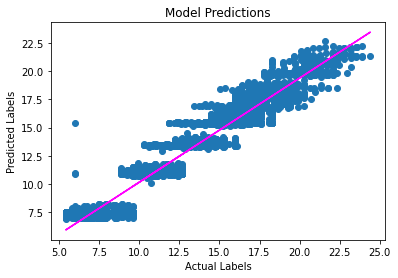

In [83]:
#We take the parameters from previous table and check for the r2 with these included. Error is already taken into account in our Random Search
model = GradientBoostingRegressor(n_estimators=100, max_leaf_nodes=20, learning_rate=0.109889).fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Model Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [94]:
#For research purposes we also take the parameters of the 2nd place in our table
model2 = GradientBoostingRegressor(n_estimators=200, max_leaf_nodes=20, learning_rate=0.160519).fit(X_train, y_train)
predictions = model2.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 0.9894698429322861
RMSE: 0.9947209874795475
R2: 0.928290512913803


We did find a better score with the Random Search. Or final socre is a r2 of: 0.928421. Now that we have the best model, we add the predictions to the original table and compare them to check if we don't have an overfitted model.

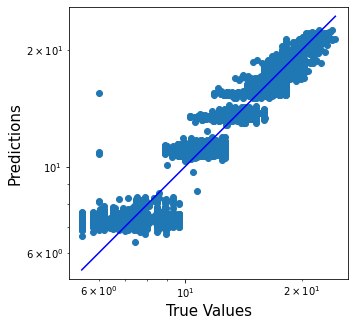

In [105]:
#We double check the valeus between actual and predicted.
plt.figure(figsize=(5,5))
plt.scatter(y_test, predictions)
plt.yscale('log')
plt.xscale('log')
p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [101]:
#We insert a column of predictions to the dataframe. 
y_hats2 = model.predict(X) 
df.insert(1, "predictions", y_hats2)
#We insert a column of the calculated error to the dataframe. 
y_error = df['int_rate'] - df['predictions']
df.insert(2,"error", y_error)
df

,int_rate,predictions,error,loan_amnt,term,annual_inc,grade_A,grade_B,grade_C,grade_D,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10.65,10.968273,-0.318273,5000,36,24000.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.27,13.701811,1.568189,2500,60,30000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,15.96,13.450960,2.509040,2400,36,12252.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,13.49,13.443888,0.046112,10000,36,49200.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,12.69,11.078886,1.611114,3000,60,80000.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,8.07,7.139521,0.930479,2500,36,110000.0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
39782,10.28,13.457790,-3.177790,8500,36,18000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
39783,8.07,7.231479,0.838521,5000,36,100000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39784,7.43,7.314851,0.115149,5000,36,200000.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


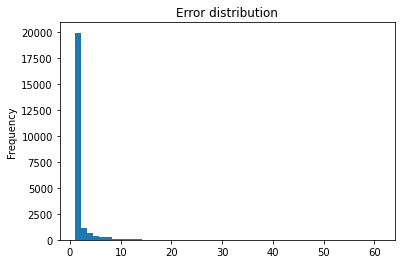

In [109]:
#Check for the error distribution. 
df['error'].value_counts().plot.hist(bins=50)
plt.title('Error distribution')
plt.show()

The best model is: GradientBoostingRegressor <br>
With the parameters: (n_estimators=200, max_leaf_nodes=20, learning_rate=0.160519) <br>
Giving the results:<br> MSE: 0.9876637969918498<br>
RMSE: 0.9938127575111168<br>
R2: 0.9284214018226141

In [111]:
!jupyter nbconvert --to PDF "Task2_BigData.ipynb"

[NbConvertApp] WARNING | pattern 'Task2_BigData.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
 